# 第3章 线性神经网络

## 3.1 线性回归

### 练习3.1.1 

假设我们有一些数据$x_1, \ldots, x_n \in \mathbb{R}$。我们的目标是找到一个常数$b$，使得最小化$\sum_i (x_i - b)^2$。

1. 找到最优值$b$的解析解。
2. 这个问题及其解与正态分布有什么关系?

**解答：**

**第1问：**

&emsp;&emsp;首先，最优值的b满足$\displaystyle \frac{d   \sum_i (x_i - b)^2}{d b}=0$ 求b的导数：

&emsp;&emsp;接着，可以将左边的式子进行化简：

$$
\begin{aligned} 
\displaystyle \frac{d  \sum_i (x_i - b)^2}{d b}&=2\sum_i (x_i -  b)\\
&= 2(\sum_i x_i  -nb)\\
&= 2 n (\bar{x}-b)

\end{aligned}
$$
&emsp;&emsp;$\bar{x}$ 是$x_1, \ldots, x_n$的平均值.因此当且仅当$b = \bar{x}$时，$\sum_i (x_i - b)^2$最小.

**第2问：**

&emsp;&emsp;假设$x_1, \ldots, x_n$是从正态分布中采样得到的，那么$b = \bar{x}$是最大似然估计下的均值。也就是说，如果假设数据来自正态分布，并且想要找到一个最好的均值来描述这些数据，那么可以选择样本均值作为估计量。

&emsp;&emsp;所以，该问题及其解与$x_1, \ldots, x_n$符合正态分布相关。

### 练习3.1.2

推导出使用平方误差的线性回归优化问题的解析解。为了简化问题，可以忽略偏置$b$（我们可以通过向$\mathbf X$添加所有值为1的一列来做到这一点）。

1. 用矩阵和向量表示法写出优化问题（将所有数据视为单个矩阵，将所有目标值视为单个向量）。
2. 计算损失对$w$的梯度。
3. 通过将梯度设为0、求解矩阵方程来找到解析解。
4. 什么时候可能比使用随机梯度下降更好？这种方法何时会失效？

**解答：**

**第1问：**

&emsp;&emsp;对于线性回归问题，损失函数是平方误差。假设我们有一个数据集$\{(\mathbf x_1, y_1), \ldots, (\mathbf x_n, y_n)\}$，其中$\mathbf x_i \in \mathbb R^d$是输入特征，$y_i \in \mathbb R$是标签。我们的目标是找到一组权重向量$\mathbf w \in \mathbb R^d$，使得预测值$\hat{y}_i = \mathbf w^\top\mathbf x_i$（忽略偏置$b$）与真实标签$y_i$之间的平方误差最小化。因此，损失函数可以写成以下形式：

$$
L(\mathbf w) = \frac{1}{2n} \sum_{i=1}^n (\hat{y}_i - y_i)^2 = \frac{1}{2n} \| \mathbf X\mathbf w - \mathbf y \|_2^2,
$$

其中$\mathbf X = [\mathbf x_1^\top, \ldots, \mathbf x_n^\top]^\top$是输入特征的矩阵，$\mathbf y = [y_1, \ldots, y_n]^\top$是标签向量。

&emsp;&emsp;则线性回归优化问题可以写成：
$$
\min_{\mathbf w} \frac{1}{2n} \| \mathbf X\mathbf w - \mathbf y \|_2^2.
$$

**第2问：**

&emsp;&emsp;损失函数对权重向量$\mathbf w$的梯度为

$$
\nabla_{\mathbf w} L(\mathbf w) = \frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i) \nabla_{\mathbf w} \hat{y}_i = \frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i) \mathbf x_i,
$$

其中$\hat{\mathbf y} = [\hat{y}_1, \ldots, \hat{y}_n]^\top$是预测值向量。

**第3问：**

&emsp;&emsp;根据题意，将梯度设为0，可得：

$$ 
\nabla_{\mathbf w} L(\mathbf w) = \frac{1}{n} \mathbf X^\top (\hat{\mathbf y} - \mathbf y) = 0 
$$

其中，$\hat{\mathbf y}$ 是预测值，$\mathbf y$ 是真实值，$\mathbf X$ 是输入数据。将上式变形为：

$$ 
\mathbf X^\top (\hat{\mathbf y} - \mathbf y) = 0 
$$

进一步变形得到：

$$ 
\mathbf X^\top \hat{\mathbf y} = \mathbf X^\top \mathbf y 
$$

因为 $\hat{\mathbf y} = \mathbf X\hat{\mathbf w}$，所以：

$$ 
\begin{aligned} 
&\quad\; \mathbf X^\top (\hat{\mathbf y} - \mathbf y) = 0 \\ 
&\Rightarrow\; \mathbf X^\top ({\mathbf X}{\mathbf w} - \mathbf y) = 0 \\ 
&\Rightarrow\; {\mathbf w} = ({\mathbf X}^\top{\mathbf X})^{-1}{\mathbf X}^\top\mathbf y \\ 
\end{aligned} 
$$

**第4问：**

&emsp;&emsp;当数据集较小时，解析解可能比随机梯度下降更好。然而，在大型数据集上，计算解析解可能会非常耗时。此外，当矩阵$\mathbf X^\top\mathbf X$不可逆时，解析解不存在。在这种情况下，需要使用正则化或数值优化方法。

### 练习3.1.3

假定控制附加噪声$\epsilon$的噪声模型是指数分布。也就是说，$\displaystyle p(\epsilon) = \frac{1}{2} \exp(-|\epsilon|)$

1. 写出模型$-\log P(\mathbf y \mid \mathbf X)$下数据的负对数似然。
2. 请试着写出解析解。
3. 提出一种随机梯度下降算法来解决这个问题。哪里可能出错？（提示：当我们不断更新参数时，在驻点附近会发生什么情况）请尝试解决这个问题。

**解答：**

**第1问：**

&emsp;&emsp;根据题意噪声服从指数分布，如下式：
$$
y = {\mathbf w}^T {\mathbf x} + b + \epsilon
$$
其中，$\displaystyle p(\epsilon) = \frac{1}{2} \exp(-|\epsilon|)$

可得到给定的$\mathbf x$观测到特定$y$的似然：
$$
P(\mathbf y | \mathbf X) = \frac{1}{2} \exp (- |y - {\mathbf w}^T {\mathbf x} - b|)
$$

根据极大似然估计法，参数$\mathbf w$和$b$的最优值是使整个数据集的似然最大的值：
$$
\begin{aligned}
P(\mathbf y | \mathbf X) 
&= \prod_{i=1}^n p(y^{(i)} | x^{i}) \\
&= \prod_{i=1}^n \left( \frac{1}{2} \exp \left ( - \left |y^{(i)} - {\mathbf w}^T x^{(i)} - b \right | \right) \right) \\
&= \left( \frac{1}{2} \right)^n \exp \left( - \sum_{i=1}^n \left | y^{(i)} - {\mathbf w}^T x^{(i)} - b \right | \right)
\end{aligned}
$$

可得到负对数似然：
$$
-\log P(\mathbf y | \mathbf X) = n \log 2 + \sum_{i=1}^n \left | y^{(i)} - {\mathbf w}^T x^{(i)} - b\right |
$$

**第2问：**

&emsp;&emsp;根据负对数似然可得到损失函数：
$$
L(\mathbf w, b) = n \log 2 + \sum_{i=1}^n \left | y^{(i)} - {\mathbf w}^T x^{(i)} - b\right |
$$

由于损失函数是一个绝对值函数，因此该问题没有解析解。

**第3问：**

&emsp;&emsp;根据题意，可使用随机梯度下降（SGD）算法求解，可计算梯度：
$$
\nabla_{\mathbf w} L(\mathbf w, b) = - \sum_{i=1}^n x^{(i)} \cdot \text{sgn} (y^{(i)} - {\mathbf w}^T x^{(i)} - b) \\
\nabla_{\mathbf b} L(\mathbf w, b) = - \sum_{i=1}^n \text{sgn} (y^{(i)} - {\mathbf w}^T x^{(i)} - b)
$$

&emsp;&emsp;对于SGD算法，每次迭代使用一个样本，则参数更新为：
$$
\begin{array}{ll}
\mathbf w \leftarrow \mathbf w + \eta x^{(i)} \cdot \text{sgn} (y^{(i)} - {\mathbf w}^T x^{(i)} - b) \\
b \leftarrow b + \eta \cdot \text{sgn} (y^{(i)} - {\mathbf w}^T x^{(i)} - b)
\end{array}
$$
其中 $\eta$ 是学习率。

&emsp;&emsp;由于使用了绝对值函数作为损失函数，梯度在接近驻点（即梯度接近零的点）时，梯度不会平滑地趋向于零，而是存在突变。当使用SGD算法，不断更新参数时，可能导致模型无法稳定收敛。

&emsp;&emsp;解决该问题的方法：
1. 使用平滑的损失函数，可使用MSE、Smooth L1损失函数等。
2. 调整学习率，逐渐减小学习率，使得在驻点附近的参数更新更加稳定
3. 使用动量法或自适应学习率优化算法

## 3.2 线性回归的从零开始实现

### 练习3.2.1

如果我们将权重初始化为零，会发生什么。算法仍然有效吗？

**解答：**

&emsp;&emsp;如果将权重初始化为零，那么每个神经元的输出都是相同的，这意味着每个神经元学习到的参数也是相同的。因此，每个神经元都会更新相同的参数，最终导致所有神经元学习到相同的特征。因此，权重初始化为零会使算法失效。这样就失去了神经网络的优势，即可以学习到不同特征的能力。

&emsp;&emsp;逻辑回归和神经网络有不同的权重初始化方法。对于逻辑回归，可以将权重初始化为零，因为这是一个线性模型，梯度下降算法仍然可以更新它们。然而，对于神经网络来说，将权重初始化为零可能会导致对称性问题，并阻止隐藏单元学习不同的特征。因此，最好使用随机或其他方法来初始化神经网络的权重。

### 练习3.2.2

假设试图为电压和电流的关系建立一个模型。自动微分可以用来学习模型的参数吗?

**解答：**

&emsp;&emsp;根据电压（$U$）与电流（$I$）的关系，可以构建模型：
$$
U = {\mathbf w}^T I + b
$$

&emsp;&emsp;自动微分（Automatic Differentiation，简称AD）是一种对计算机程序进行高效准确求导的技术。它是介于符号微分和数值微分之间的一种方法，可以计算可导函数在某点处的导数值的计算，是反向传播算法的一般化。

&emsp;&emsp;自动微分要解决的核心问题是计算复杂函数，通常是多层复合函数在某一点处的导数、梯度以及Hessian矩阵值
torch中的backward就是自动微分。backward()函数会自动计算所有需要求导的变量的梯度，并将结果存储在相应变量的grad属性中。

根据书中对自动微分的描述：
> &emsp;&emsp;深度学习框架通过自动计算导数，即自动微分（automatic differentiation）来加快求导。 实际中，根据设计好的模型，系统会构建一个计算图（computational graph）， 来跟踪计算是哪些数据通过哪些操作组合起来产生输出。 自动微分使系统能够随后反向传播梯度。 这里，反向传播（backpropagate）意味着跟踪整个计算图，填充关于每个参数的偏导数。

&emsp;&emsp;用代码验证电阻为$30 \Omega$的电流与电压的计算公式：

In [1]:
import torch

# 生成数据
x = torch.randn(100, 1)
y = 30 * x

# 定义模型
model = torch.nn.Linear(1, 1)

# 定义损失函数和优化器
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# 训练模型
for epoch in range(500):
    # 前向传播
    y_pred = model(x)

    # 计算损失
    loss = criterion(y_pred, y)

    # 反向传播
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(model.weight)
print(model.bias)

Parameter containing:
tensor([[29.9949]], requires_grad=True)
Parameter containing:
tensor([-0.0012], requires_grad=True)


### 练习3.2.3

能基于[普朗克定律](https://en.wikipedia.org/wiki/Planck%27s_law)使用光谱能量密度来确定物体的温度吗？

**解答：**

&emsp;&emsp;根据维基百科：
> &emsp;&emsp;在物理学中，普朗克黑体辐射定律（也简称普朗克定律或黑体辐射定律）是指在任意温度$\displaystyle T$下，从一个黑体中发射出的电磁辐射的辐射率与频率之间的关系，在这里，辐射率是频率$\nu$的函数：
> $$
I_{\nu }(\nu ,T)={\frac {2h\nu ^{3}}{c^{2}}}{\frac {1}{e^{\frac {h\nu }{kT}}-1}}
$$
其中，$I_{\nu}$是辐射率，$\nu$是频率，$T$是黑体的温度，$h$是普朗克常数，$c$是光速，$k$是波兹曼常数。
> 
> 根据电磁波波长和频率的关系为
> $$
\lambda = \frac{c}{\nu}
$$
> 普朗克定律有时写做能量密度频谱的形式：
> $$
u_{ \nu }(\nu ,T) 
= \frac{4 \pi}{c} I_{\nu }(\nu ,T) 
= \frac {8 \pi h \nu^{3}}{c^3} \frac {1}{e^{\frac {h\nu }{kT}} - 1}
$$

&emsp;&emsp;根据上述公式，可以得到物体的温度计算公式：
$$
T = \frac{h \nu}{K \ln \left( 1 + \displaystyle \frac{8 \pi h \nu^3}{c^3 u_{\nu}} \right)}
$$

&emsp;&emsp;通过测量物体发出的辐射能量密度，并使用普朗克定律，可以确定物体的温度。

### 练习3.2.4

计算二阶导数时可能会遇到什么问题？这些问题可以如何解决？

**解答：**

&emsp;&emsp;计算计算二阶导数时可能会遇到如下问题：

1. 数值不稳定性问题：该问题可以通过使用更高精度的数据类型（例如双精度浮点数）或通过使用数值稳定性技巧（例如中心差分）来解决。  
中心差分是一种常用的数值稳定性技巧，它可以用于计算函数在某个点处的导数。具体来说，中心差分可以通过以下公式计算：

$$f'(x) \approx \frac{f(x+h)-f(x-h)}{2h}$$

&emsp;&emsp;其中 $h$ 是一个很小的正数，通常取 $10^{-6}$ 或更小。

2. 一阶导数的计算图保存问题：计算二阶导数，需要将一阶导数的计算图保存起来，使用`create_graph`和`retain_graph`参数

以下面函数举例：

- 原函数：$ y = x^3$
- 一阶导函数：$y = 3 x^2$
- 二阶导函数：$y = 6 x$

In [2]:
import torch

x = torch.randn((2), requires_grad=True)
y = x ** 3

In [3]:
# 一阶导数
dy = torch.autograd.grad(y, x, grad_outputs=torch.ones(x.shape), 
                         retain_graph=True, create_graph=True)

# 二阶导数
dy2 = torch.autograd.grad(dy, x, grad_outputs=torch.ones(x.shape))

In [4]:
dy[0] == 3 * x**2

tensor([True, True])

In [5]:
dy2[0] == 6 * x

tensor([True, True])

### 练习3.2.5

为什么在`squared_loss`函数中需要使用`reshape`函数？

**解答：**

书中第3.2.5节的代码：

In [6]:
def squared_loss(y_hat, y):  #@save
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

&emsp;&emsp;这里使用`reshape`函数是为了保证`y`和`y_hat`形状相同，避免触发广播机制导致错误的结果。

### 练习3.2.6

尝试使用不同的学习率，观察损失函数值下降的快慢。

**解答：**

In [7]:
%matplotlib inline
import random
import torch
import numpy as np
from d2l import torch as d2l

In [8]:
# 生成数据集
def synthetic_data(w, b, num_examples):  #@save
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [9]:
# 读取数据集
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [10]:
# 初始化参数
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [11]:
def linreg(X, w, b):  #@save
    """线性回归模型"""
    return torch.matmul(X, w) + b

In [12]:
def squared_loss(y_hat, y):  #@save
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [13]:
def sgd(params, lr, batch_size):  #@save
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [14]:
lrs = [0.5, 0.3, 0.1, 0.01]
num_epochs = 10
net = linreg
loss = squared_loss

batch_size = 10

all_lrs = []
for lr in lrs:
    train_lrs = []
    for epoch in range(num_epochs):
        for X, y in data_iter(batch_size, features, labels):
            l = loss(net(X, w, b), y)  # X和y的小批量损失
            # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
            # 并以此计算关于[w,b]的梯度
            l.sum().backward()
            sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
        with torch.no_grad():
            train_l = loss(net(features, w, b), labels)
            train_lrs.append(float(train_l.mean()))
    all_lrs.append(train_lrs)

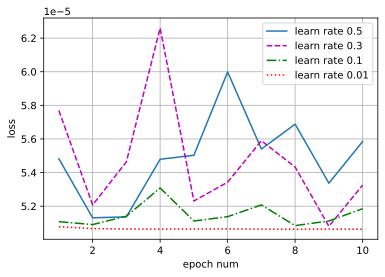

In [15]:
epochs = np.arange(1, num_epochs+1)
d2l.plot(epochs, all_lrs, xlabel='epoch num', ylabel='loss', 
         legend=[f'learn rate {lr}' for lr in lrs],
         figsize=(6, 4))

&emsp;&emsp;根据上述试验结果，可得到如下结论：
1. 学习率过大前期损失值下降快，但是后面不容易收敛
2. 学习率太小，损失函数下降慢

### 练习3.2.7

如果样本个数不能被批量大小整除，`data_iter`函数的行为会有什么变化？

**解答：**

&emsp;&emsp;如果样本个数不能被批量大小整除，则在最后一个迭代周期中，最后一批次可能包含少于批量大小个样本。在这种情况下，我们只需忽略该批次中多余的样本即可。例如，1000个总样本，batch_size=3，那么最后1个样本会被舍去。

## 3.3 线性回归的简洁实现

### 练习3.3.1

如果将小批量的总损失替换为小批量损失的平均值，需要如何更改学习率？

**解答：**

&emsp;&emsp;如果将小批量的总损失替换为小批量损失的平均值，则需要将学习率乘以批量大小。这是因为在计算梯度时，我们使用了小批量中所有样本的信息。因此，如果我们将小批量的总损失替换为小批量损失的平均值，则相当于将每个样本的梯度除以批量大小。因此，我们需要将学习率乘以批量大小，以保持相同的更新步长。

### 练习3.3.2

查看深度学习框架文档，它们提供了哪些损失函数和初始化方法？用Huber损失代替原损失，即
$$
l(y,y') = \begin{cases}|y-y'| - \displaystyle \frac{\sigma}{2} & \text{ if } |y-y'| > \sigma \\ 
\displaystyle \frac{1}{2 \sigma} (y-y')^2 & \text{ 其它情况}\end{cases}
$$

**解答：**

&emsp;&emsp;通过查看深度学习框架文档，有以下损失函数
（参考链接：https://pytorch.org/docs/2.0/nn.html#loss-functions ）
- L1Loss：L1范数损失函数
- MSELoss：平均平方误差损失函数
- CrossEntropyLoss：交叉熵损失函数
- CTCLoss：连接时序分类损失函数
- NLLLoss：负对数似然损失函数
- PoissonNLLLoss：目标值为泊松分布的负对数似然损失函数
- GaussianNLLLoss：目标值为高斯分布的负对数似然损失函数
- KLDivLoss：KL散度损失函数
- BCELoss：二元交叉熵损失函数
- BCEWithLogitsLoss：基于sigmoid的二元交叉熵损失函数
- MarginRankingLoss
- HingeEmbeddingLoss
- MultiLabelMarginLoss：
- HuberLoss：基于Huber的损失函数
- SmoothL1Loss：L1平滑损失函数
- SoftMarginLoss
- MultiLabelSoftMarginLoss
- CosineEmbeddingLoss
- MultiMarginLoss
- TripletMarginLoss：三元组损失函数
- TripletMarginWithDistanceLoss

初始化方法有（参考链接：https://pytorch.org/docs/2.0/nn.init.html ）

- calculate_gain(nonlinearity, param=None)：计算对非线性函数增益值
- uniform_(tensor, a=0.0, b=1.0)：生成符合均匀分布的值
- normal_(tensor, mean=0.0, std=1.0)：生成符合正态分布的值
- constant_(tensor, val)：用 val 的值填充输入的张量或变量
- ones_(tensor)：用1来填充张量或变量
- zeros_(tensor)： 用0来填充张量或变量
- eye_(tensor)：用单位矩阵来填充张量或变量
- dirac_(tensor, groups=1)：用 Dirac delta 函数来填充{3, 4, 5}维输入张量或变量
- xavier_uniform_(tensor, gain=1.0)
- xavier_normal_(tensor, gain=1.0)
- kaiming_uniform_(tensor, a=0, mode='fan_in', nonlinearity='leaky_relu')：
- kaiming_normal_(tensor, a=0, mode='fan_in', nonlinearity='leaky_relu')：
- trunc_normal_(tensor, mean=0.0, std=1.0, a=- 2.0, b=2.0)：
- orthogonal_(tensor, gain=1)：
- sparse_(tensor, sparsity, std=0.01)：将 2 维的输入张量或变量当做稀疏矩阵填充，结果张量中的值采样自 N(0,0.01)

In [16]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

In [17]:
# 生成数据集
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)

In [18]:
# 读取数据集
def load_array(data_arrays, batch_size, is_train=True):  #@save
    """构造一个PyTorch数据迭代器"""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 10
data_iter = load_array((features, labels), batch_size)

In [19]:
# nn是神经网络的缩写
from torch import nn

net = nn.Sequential(nn.Linear(2, 1))

In [20]:
# 使用Huber损失函数
loss = nn.HuberLoss()

In [21]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

In [22]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X) ,y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 2.346448
epoch 2, loss 0.604051
epoch 3, loss 0.003751


In [23]:
w = net[0].weight.data
print('w的估计误差：', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('b的估计误差：', true_b - b)

w的估计误差： tensor([ 0.0357, -0.0612])
b的估计误差： tensor([0.0512])


### 练习3.3.3

如何访问线性回归的梯度？

**解答：**

&emsp;&emsp;要访问线性回归模型的梯度，可以使用自动微分技术。在PyTorch中，可以通过调用`backward()`方法来计算模型参数相对于损失函数的梯度。然后，可以通过访问模型参数的`.grad`属性来获取梯度值。

In [24]:
w_grad = net[0].weight.grad
print('w的梯度：', w_grad)
b_grad = net[0].bias.grad
print('b的梯度：', b_grad)

w的梯度： tensor([[-0.0009,  0.0628]])
b的梯度： tensor([-0.0801])


## 3.4 softmax回归

### 练习3.4.1

我们可以更深入地探讨指数族与softmax之间的联系。

1. 计算softmax交叉熵损失$l(\mathbf{y},\hat{\mathbf{y}})$的二阶导数。
2. 计算$\mathrm{softmax}(\mathbf{o})$给出的分布方差，并与上面计算的二阶导数匹配。  

**解答：**

**第1问：**

&emsp;&emsp;根据书中第3.4.6.2节
> 利用 softmax 的定义，我们得到：
$$
\begin{aligned}
l(\mathbf{y}, \hat{\mathbf{y}}) &=  - \sum_{j=1}^q y_j \log \frac{\exp(o_j)}{\sum_{k=1}^q \exp(o_k)} \\
&= \sum_{j=1}^q y_j \log \sum_{k=1}^q \exp(o_k) - \sum_{j=1}^q y_j o_j\\
&= \log \sum_{k=1}^q \exp(o_k) - \sum_{j=1}^q y_j o_j
\end{aligned}
$$
> 考虑相对于任何未规范化的预测$o_j$的导数，我们得到：
$$
\partial_{o_j} l(\mathbf{y}, \hat{\mathbf{y}}) = \frac{\exp(o_j)}{\sum_{k=1}^q \exp(o_k)} - y_j = \mathrm{softmax}(\mathbf{o})_j - y_j
$$
> 

&emsp;&emsp;可计算二阶导数：

$$
\begin{aligned}
\partial_{o_j}^2 l(\mathbf{y}, \hat{\mathbf{y}}) 
& = \frac{\exp(o_j)*\sum_{k=1}^q \exp(o_k)-\exp(o_j)^2}{(\sum_{k=1}^q \exp(o_k))^2} \\
&= \mathrm{softmax}(\mathbf{o})_j - (\mathrm{softmax}(\mathbf{o})_j)^2 \\
&= \mathrm{softmax}(\mathbf{o})_j(1-\mathrm{softmax}(\mathbf{o})_j)
\end{aligned}
$$

&emsp;&emsp;其中，$\mathrm{softmax}(\mathbf{o})$是由向量$\mathbf{o}$的元素通过softmax函数计算得到的概率分布。

**第2问：**

&emsp;&emsp;对于softmax函数$\mathrm{softmax}(\mathbf{o})$，其分布方差为：

$$ 
\begin{aligned} 
\mathrm{Var}_{\mathrm{softmax}(\mathbf{o})} 
&= \sum_{j=1}^q (\mathrm{softmax}(\mathbf{o})_j - E[\mathrm{softmax}(\mathbf{o})_j])^2 \\ 
&= \sum_{j=1}^q (\mathrm{softmax}(\mathbf{o})_j - \frac{1}{q}\sum_{k=1}^q \mathrm{softmax}(\mathbf{o})_k)^2 \\ 
&= \sum_{j=1}^q (\mathrm{softmax}(\mathbf{o})_j - \frac{1}{q})^2 \\
\end{aligned} 
$$

### 练习3.4.2

假设我们有三个类发生的概率相等，即概率向量是$\displaystyle (\frac{1}{3}, \frac{1}{3}, \frac{1}{3})$。

1. 如果我们尝试为它设计二进制代码，有什么问题？
2. 请设计一个更好的编码。提示：如果我们尝试为两个独立的观察结果编码会发生什么？如果我们为$n$个观测值联合编码怎么办？

**解答：**

**第1问：**

&emsp;&emsp;根据题意，三个类发生的概率都是$\displaystyle \frac{1}{3}$，使用二进制代码表示，如果使用两个独立的观察结果进行编码，则需要至少两个比特才能区分三个类别。但是，这意味着平均长度为$\displaystyle \frac{2}{3}$比特，而不是最优长度$\log_2 3 \approx 1.585$比特。

**第2问：**

&emsp;&emsp;可以使用联合编码来解决这个问题。具体来说，可以将$n$个观测值视为一个$n$元组，并将其映射到一个整数。例如，如果$n=2$，则可以将$(0, 0)$映射到0、$(0, 1)$映射到1、$(1, 0)$映射到2、$(1, 1)$映射到3。这样做的好处是可以使用$\lceil \log_2 3 \rceil = 2$比特来编码三个类别。

&emsp;&emsp;对于$n$个观测值，使用长度为$\displaystyle k=\left \lceil \log_2 {n+2 \choose 2} \right \rceil$的二进制代码来表示$n$个观测值的联合分布。

### 练习3.4.3

softmax是对上面介绍的映射的误称（虽然深度学习领域中很多人都使用这个名字）。真正的softmax被定义为 $\mathrm{RealSoftMax}(a, b) = \log (\exp(a) + \exp(b))$。

1. 证明 $\mathrm{RealSoftMax}(a, b) > \mathrm{max}(a, b)$。
2. 证明 $\lambda^{-1} \mathrm{RealSoftMax}(\lambda a, \lambda b) > \mathrm{max}(a, b)$ 成立，前提是$\lambda > 0$。
3. 证明对于 $\lambda \to \infty$，有$\lambda^{-1} \mathrm{RealSoftMax}(\lambda a, \lambda b) \to \mathrm{max}(a, b)$。
4. softmin会是什么样子？
5. 将其扩展到两个以上的数字。

**解答：**

**第1问：**

根据题意可知：
$$
\mathrm{RealSoftMax} (a, b) = \log (\exp(a) + \exp(b))
$$

根据log函数的性质：
$$
\log (\exp(a) + \exp(b)) > \log (\exp(a)) = a \\
\log (\exp(a) + \exp(b)) > \log (\exp(b)) = b
$$

结合上述两式，可得：
$$
\mathrm{RealSoftMax}(a, b) > \max(a,b)
$$

**第2问：**

$$
\begin{aligned}
\lambda^{-1} \mathrm{RealSoftMax}(\lambda a, \lambda b) 
&= \lambda^{-1} \log (\exp(\lambda a) + \exp(\lambda b)) \\
&> \lambda^{-1} \log (\max(\exp(\lambda a),\exp(\lambda b))) \\
&= \log (\max (e^{\lambda a \cdot \lambda^{-1}}, e^{\lambda b \cdot \lambda^{-1}})) \\
&= \log (\max (e^a, b^a)) \\
&= \max(\log e^a, \log e^b) \\
&= \max(a,b)
\end{aligned}
$$

因此$\lambda^{-1} \mathrm{RealSoftMax}(\lambda a, \lambda b) > \max(a,b)$成立，前提是$\lambda > 0$。

**第3问：**

&emsp;&emsp;根据题意，令：
$$
\begin{aligned}
f(a, b, \lambda) 
&= \lambda^{-1} \mathrm{RealSoftMax}(\lambda a, \lambda b) \\
&= \lambda^{-1} \log (\exp(\lambda a) + \exp(\lambda b))
\end{aligned}
$$

&emsp;&emsp;可知：
$$
\begin{aligned}
f(a, b, \lambda)
&> \lambda^{-1} \log (\exp(\lambda \cdot \max(a, b))) \\
&= \log (\exp(\lambda \cdot \max(a, b) \cdot \lambda^{-1} ) ) \\
&= \log (\exp \max(a, b) ) \\
&= \max (a, b)
\end{aligned}
$$

&emsp;&emsp;又可知：
$$
\begin{aligned}
f(a, b, \lambda) 
&< \lambda^{-1} \log (\exp(2 \lambda \cdot \max(a, b))) \\
&= \frac{\log 2}{\lambda} + \max(a, b)
\end{aligned}
$$

&emsp;&emsp;当$\lambda \rightarrow \infty$ 时
$$
\lim_{\lambda \rightarrow \infty} \frac{\log 2}{\lambda} + \max(a, b) = \max(a, b)
$$

&emsp;&emsp;根据夹逼定理，可得
$$
\lim_{\lambda \rightarrow \infty} f(a, b, \lambda) = \max (a, b)
$$

&emsp;&emsp;因此对于$\lambda \to \infty$，有$\lambda^{-1}\mathrm{RealSoftMax}(\lambda a,\lambda b) \to \max(a,b)$。

**第4问：**

&emsp;&emsp;softmin函数是softmax函数的变体，将输入张量的每个元素 $x_i$ 替换为$-x_i$，然后对结果进行归一化。Softmin函数的公式如下：

$$
\mathrm{softmin}(x_i) = \frac{\exp(-x_i)}{\sum_j \exp(-x_j)}
$$

&emsp;&emsp;与softmax函数类似，softmin函数也可以用于多分类问题。不同之处在于，当输入张量中的元素越大时，softmax函数会使输出概率越大，而softmin函数则会使输出概率越小。

**第5问：**

&emsp;&emsp;根据题意，多个数字的RealSoftMax函数表示如下：

$$
\text{RealSoftMax} (a, b, c, \cdots) = \log(\exp(a) + \exp(b) + \exp(c) + \cdots)
$$

## 3.5 图像分类数据集

### 练习3.5.1

减少`batch_size`（如减少到1）是否会影响读取性能？

**解答：**

&emsp;&emsp;减少`batch_size`可能会影响读取性能。具体来说，当`batch_size`减小时，每个小批量的处理时间将增加，从而导致读取性能下降。此外，较小的批量大小可能会导致内存使用率更高。


### 练习3.5.2

数据迭代器的性能非常重要。当前的实现足够快吗？探索各种选择来改进它。

**解答：**

&emsp;&emsp;根据书中第3.5.2节
> &emsp;&emsp;为了使我们在读取训练集和测试集时更容易，我们使用内置的数据迭代器，而不是从零开始创建。
> ```python
> batch_size = 256
>
> def get_dataloader_workers():  #@save
    """使用4个进程来读取数据"""
    return 4
>
> train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True,
>                             num_workers=get_dataloader_workers())
```

&emsp;&emsp;书中使用的是PyTorch的DataLoader数据迭代器，数据迭代器的性能对于训练深度学习模型非常重要。当前的实现可能足够快，但是我们可以探索各种选择来改进它。例如，我们可以使用多线程或异步读取来加速数据迭代器。此外，我们还可以使用GPU加速数据预处理和增强。

### 练习3.5.3

查阅框架的在线API文档。还有哪些其他数据集可用？

**解答：**

&emsp;&emsp;通过查阅框架的在线API文档（参考链接：https://pytorch.org/vision/stable/datasets.html#built-in-datasets ），可以得到很多标准数据集，包括图像分类（Image classification）、图像检测或分割（Image detection or segmentation）、光流（Optical Flow）、立体声匹配（Stereo Matching）、图像对（Image pairs）、图片字幕（Image captioning）、视频分类（Video classification）、视频预测（Video prediction）。

&emsp;&emsp;例如MNIST、CIFAR-10和ImageNet等。此外，还有许多其他数据集可用于特定领域的任务。

## 3.6 softmax回归的从零开始实现

### 练习3.6.1

本节直接实现了基于数学定义softmax运算的`softmax`函数。这可能会导致什么问题？提示：尝试计算$\exp(50)$的大小。

**解答：**

&emsp;&emsp;根据题意，使用书中实现的`softmax`函数

In [25]:
def softmax(X):
    X_exp = np.exp(X)
    partition = X_exp.sum(1, keepdims=True)
    return X_exp / partition  # 这里应用了广播机制

In [26]:
try:
    softmax(np.array([[50]]))
except Exception as e:
    print(e)

&emsp;&emsp;由于指数函数的值域是 $(0,\infty)$，因此可能会出现数值上溢的问题。这就是说，由于 $\exp(50)$ 的结果非常大，它可能超出计算机所能表示的范围，从而被近似为无穷大（inf）。这会带来一些问题，例如在反向传播时可能会出现NaN（不是数字）的情况。解决这个问题的一种常用技巧是，在计算softmax之前，先从所有输入中减去输入中的最大值。这样可以确保指数函数的输入不会太大而导致数值上溢。

### 练习3.6.2

本节中的函数`cross_entropy`是根据交叉熵损失函数的定义实现的。它可能有什么问题？提示：考虑对数的定义域。

**解答：**

&emsp;&emsp;交叉熵损失函数定义了log函数。当模型预测概率为0时，log函数的值为负无穷。因此，在实际计算时，通常忽略预测概率接近0的样本对损失函数的贡献。这可能会导致模型欠拟合，并且在训练过程中难以收敛。

### 练习3.6.3

请提出一个解决方案来解决上述两个问题。

**解答：**

&emsp;&emsp;解决第一个问题的方法是使用PyTorch框架中实现的softmax方法（`torch.nn.functional.softmax`），先通过减去输入向量中的元素最大值来缩放softmax运算的输出。解决第二个问题的方法是使用PyTorch框架中实现的交叉熵损失函数（`torch.nn.CrossEntropyLoss`）。

### 练习3.6.4

返回概率最大的分类标签总是最优解吗？例如，医疗诊断场景下可以这样做吗？

**解答：**

&emsp;&emsp;在某些情况下，返回概率最大的分类标签可能不是最优解。例如，在医疗诊断场景下，我们更关心误诊率和漏诊率等错误类型之间的权衡，并且尽可能避免小概率事件的发生。

### 练习3.6.5

假设我们使用softmax回归来预测下一个单词，可选取的单词数过多可能会带来哪些问题?

**解答：**

&emsp;&emsp;根据题意可知，如果可选取单词数量过多，有以下问题：
1. 单词量过大，会导致计算的复杂度增加
2. 需要计算更多模型参数，并会导致模型复杂度增加
3. 所有的单词所得概率容易接近0，导致难以判断输出结果
4. 在训练期间需要处理更多数据，并且预测时间也会变得更长

## 3.7 softmax回归的简洁实现

### 练习3.7.1

尝试调整超参数，例如批量大小、迭代周期数和学习率，并查看结果。

**解答：**

In [27]:
import torch
from torch import nn
from d2l import torch as d2l

In [28]:
# PyTorch不会隐式地调整输入的形状。因此，
# 我们在线性层前定义了展平层（flatten），来调整网络输入的形状
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

In [29]:
# 设置损失函数
loss = nn.CrossEntropyLoss(reduction='none')

# 设置优化器
trainer = torch.optim.SGD(net.parameters(), lr=0.1)

In [30]:
%%time
num_epochs = 10
batch_size = 256

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

AttributeError: module 'd2l.torch' has no attribute 'train_ch3'

In [31]:
%%time
net.apply(init_weights);
num_epochs = 100
batch_size = 256

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

AttributeError: module 'd2l.torch' has no attribute 'train_ch3'

In [32]:
%%time
net.apply(init_weights);
num_epochs = 10
batch_size = 16

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

AttributeError: module 'd2l.torch' has no attribute 'train_ch3'

In [33]:
%%time
net.apply(init_weights);
num_epochs = 10
batch_size = 64

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

AttributeError: module 'd2l.torch' has no attribute 'train_ch3'

In [34]:
%%time
net.apply(init_weights);
num_epochs = 10
batch_size = 128

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

AttributeError: module 'd2l.torch' has no attribute 'train_ch3'

In [35]:
%%time
net.apply(init_weights);
num_epochs = 20
batch_size = 1024

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

AttributeError: module 'd2l.torch' has no attribute 'train_ch3'

In [36]:
%%time
net.apply(init_weights);
num_epochs = 20
batch_size = 128

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

AttributeError: module 'd2l.torch' has no attribute 'train_ch3'

In [37]:
%%time
# 设置损失函数
loss = nn.CrossEntropyLoss(reduction='none')
# 设置优化器
trainer = torch.optim.SGD(net.parameters(), lr=0.1)

net.apply(init_weights);
num_epochs = 10
batch_size = 256

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

AttributeError: module 'd2l.torch' has no attribute 'train_ch3'

In [38]:
%%time
try:
    # 设置损失函数
    loss = nn.CrossEntropyLoss(reduction='none')
    # 设置优化器
    trainer = torch.optim.SGD(net.parameters(), lr=1)

    net.apply(init_weights);
    num_epochs = 10
    batch_size = 256

    train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

    d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)
except Exception as e:
    print(e)

module 'd2l.torch' has no attribute 'train_ch3'
CPU times: total: 984 ms
Wall time: 114 ms


In [39]:
%%time
try:
    # 设置损失函数
    loss = nn.CrossEntropyLoss(reduction='none')
    # 设置优化器
    trainer = torch.optim.SGD(net.parameters(), lr=1)

    net.apply(init_weights);
    num_epochs = 100
    batch_size = 256

    train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

    d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)
except Exception as e:
    print(e)

module 'd2l.torch' has no attribute 'train_ch3'
CPU times: total: 812 ms
Wall time: 116 ms


In [40]:
%%time
try:
    # 设置损失函数
    loss = nn.CrossEntropyLoss(reduction='none')
    # 设置优化器
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)

    net.apply(init_weights);
    num_epochs = 10
    batch_size = 256

    train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

    d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)
except Exception as e:
    print(e)

module 'd2l.torch' has no attribute 'train_ch3'
CPU times: total: 750 ms
Wall time: 98.5 ms


In [41]:
%%time
try:
    # 设置损失函数
    loss = nn.CrossEntropyLoss(reduction='none')
    # 设置优化器
    trainer = torch.optim.SGD(net.parameters(), lr=0.001)

    net.apply(init_weights);
    num_epochs = 10
    batch_size = 256

    train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

    d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)
except Exception as e:
    print(e)

module 'd2l.torch' has no attribute 'train_ch3'
CPU times: total: 859 ms
Wall time: 101 ms


In [42]:
%%time
try:
    # 设置损失函数
    loss = nn.CrossEntropyLoss(reduction='none')
    # 设置优化器
    trainer = torch.optim.SGD(net.parameters(), lr=0.001)

    net.apply(init_weights);
    num_epochs = 100
    batch_size = 256

    train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

    d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)
except Exception as e:
    print(e)

module 'd2l.torch' has no attribute 'train_ch3'
CPU times: total: 578 ms
Wall time: 90.2 ms


In [43]:
%%time
try:
    # 设置损失函数
    loss = nn.CrossEntropyLoss(reduction='none')
    # 设置优化器
    trainer = torch.optim.SGD(net.parameters(), lr=0.0001)

    net.apply(init_weights);
    num_epochs = 10
    batch_size = 256

    train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

    d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)
except Exception as e:
    print(e)

module 'd2l.torch' has no attribute 'train_ch3'
CPU times: total: 609 ms
Wall time: 79.5 ms


&emsp;&emsp;通过实验，我们发现：
1. 学习率越小，收敛越慢，同时可能存在局部收敛的问题，影响训练精度。
2. 轮数越多，一般效果越好，但可能因为训练精度已收敛，会花费不必要的训练时间。
3. `batch_size`越大，训练时间越短，但是可能会影响训练精度，并且`batch_size`与机器相关，使用`GPU`训练时，显存较小可能无法满足大`batch_size`训练。

### 练习3.7.2

增加轮数，为什么测试精度会在一段时间后降低？我们怎么解决这个问题？

**解答：**

&emsp;&emsp;增加迭代周期的数量可能会导致过拟合，从而导致测试精度下降。具体来说，当我们增加迭代周期的数量时，模型可能会开始学习到一些只能满足训练样本的非共性特征（这些更多是一种偶然性特征，不适用于测试样本），从而导致过拟合。为了解决这个问题，可以使用早停技术或正则化技术。早停技术是指在模型出现过拟合时（测试集表现开始下降）停止训练。正则化技术是指通过向损失函数添加惩罚项来限制模型参数的大小，从而减少过拟合。